# **Script for creating experiment files for auditory brainstem response (ABR) experiments**

## Script Info
---
- This script creates a .wav file with audio-triggered /da/ syllables - commonly used in auditory neuroscience for evoking ABRs.

- This particular implementation uses the ABR paradigm suggested in the work of G. M. Bidelman (2015). As such, this implementation can be used to analyse both cortical and subcortical responses to the chosen stimuli. For further information, please read the paradigm's original paper¹. A visual representation of the paradigm principle is given below:
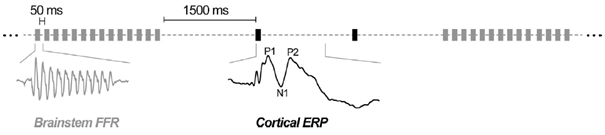

- You can easily adapt this script to your own needs by swapping out the syllable stimulus file and adapting parameters like inter stimulus interval (ISI) duration, number of sweeps per block, etc. etc.

- The script was written and tested in a Google Colab notebook. You can easily just drag & drop this script in there and have it run. Make sure to plug in your own directory paths and already audio-triggered syllable .wav  file. Alternatively, you can use the cut and triggered /da/ syllable file, that's included in this repository.

- For questions and inquiries, contact julian.ockelmann@uzh.ch

- ¹ Bidelman, G. M. (2015). Towards an optimal paradigm for simultaneously recording cortical and brainstem auditory evoked potentials. Journal of neuroscience methods, 241, 94-100.

## Contact
---
Author of this script:
- Julian Ockelmann, PhD
- Computational Neuroscience of Speech & Hearing
- University of Zurich
- julian.ockelmann@uzh.ch

## Libraries, Modules & Directories
---



In [7]:
# Install necessary libraries
!pip install pydub
!add-apt-repository -y ppa:savoury1/ffmpeg4
!apt-get -qq install -y ffmpeg

Repository: 'deb https://ppa.launchpadcontent.net/savoury1/ffmpeg4/ubuntu/ jammy main'
Description:
FFmpeg 4.4.4 builds (& associated multimedia packages) for Xenial & newer.

*** Anyone interested in full builds of FFmpeg 4.4.x including all "bells and whistles" needs to have donated, after which access to the new private PPA can be requested. See my Launchpad page linked below for details. ***

*** Please always see https://launchpad.net/~savoury1 for general updates about this Launchpad site before contacting me or reporting any bugs! ***

*** Big thanks to all those who have donated to support this project, you are very directly helping to keep it alive! To all who have not donated: please do so if you can afford it, this project depends on donations. ***

If software at this site is useful to you then please consider a donation:

*** Donations: https://paypal.me/Savoury1 & https://ko-fi.com/Savoury1 ***
*** Also https://patreon.com/Savoury1 & https://liberapay.com/Savoury1 ***

Up

In [8]:
# Import necessary modules
import os
from pydub import AudioSegment
from google.colab import files                                                  # Only necessary if you're executing the code in a google colab environment

In [9]:
# Optional: Mount Google Drive for using cloud-stored data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Set Directories (Replace with desired Working Directory)
wd = '/content/drive/MyDrive/Colab Notebooks/Utility/Audio_Files/'              # Folder containing cut stimulus files
os.chdir(wd)                                                                    # Sets current working directory to previously defined folder

## Create Silent ISI Segments
---



In [27]:
# Create 50ms empty audio file
empty_audio_50ms = AudioSegment.from_file("empty_audio_50ms.wav", format="wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# Create 1500ms empty audio file
empty_audio_1500ms = AudioSegment.from_file("empty_audio_1500ms.wav", format="wav")

## Create Stimulus Syllable Segments
---



In [24]:
# Load /da/ syllables for both polarities
da_syllable_p = AudioSegment.from_file("da_syllable_trigger_p.wav", format="wav")

In [28]:
# Combine Audio Segments 50ms ISI /da/
da_burst_50ms_positive = empty_audio_50ms + da_syllable_p

# Create Block of 14 /da/ bursts with 50ms ISI
da_burst_50ms_block = da_burst_50ms_positive *14                                # Should produce a block of 14 /da/ syllables with 50ms breaks inbetween stimuli and alternating polarity

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# %% Combine Audio Segments 1500ms ISI /da/

# Add the empty audio segment to the existing audio
da_burst_1500ms_positive = da_syllable_p + empty_audio_1500ms

# Create Block of 2 /da/ bursts with 50ms ISI
da_burst_1500ms_block = empty_audio_1500ms
da_burst_1500ms_block += da_burst_1500ms_positive + da_burst_1500ms_positive    # Should produce a block of 2 /da/ syllables with 1500ms breaks before, inbetween, and after the 2 stimuli\

In [30]:
# %% Create final building block
Combined_Block = da_burst_50ms_block + da_burst_1500ms_block

# Extract & Download Final File
---

In [31]:
# %% Create final ABR File
Final_DA_sABR_ACT_Sweeps = Combined_Block * 181                                 # Make a sequence of 181 combined blocks (2534 Subcortical 50ms ISI sweeps, 362 Cortical 1500ms ISI sweeps)

# Export/Download final ABR file
Final_DA_sABR_ACT_Sweeps.export("Final_DA_sABR_Sweeps_BM_NAP.wav", format="wav")   # Export final sABR audio file - || the default bit rate should be 1411 kbps, bit rates can be changed using the bitrate argument in the audio.export() function. - ||e.g.: audio.export("output.wav", format="wav", bitrate="16k")
files.download('Final_DA_sABR_Sweeps_BM_NAP.wav')                                  # Optional: For Google Colab users, this downloads the exported file from the environment

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>